# Trabajo Práctico 2: Análisis con Random Forest - Organización de Datos

**Alumnos y Padrón**
+ Craviotto Roitbarg, Mateo Exequiel - 106255 
+ Gómez, Joaquín - 103735

https://github.com/joaqogomez/Organizacion-de-datos-fiuba


## Configuraciones Iniciales
Primero, importamos las bibliotecas que vamos a utilizar:

In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

In [3]:
from preprocessing import dividir_dataset
from preprocessing import preparar_dataset
from preprocessing import aplicar_one_hot_encoding

In [4]:
from funcionesAuxiliares import graficar_auc_roc
from funcionesAuxiliares import traer_df

## Carga del set de datos
Cargamos el dataset y aplicamos las funciones necesarias para adecuarlo al modelo:

In [5]:
df = traer_df()
df = preparar_dataset(df)
df = aplicar_one_hot_encoding(df)

También segmentamos el dataset en X e y (target), y luego lo dividimos en subsets de entrenamiento y validation development (test)

In [6]:
X, y = dividir_dataset(df)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

## Búsqueda de hiperparámetros
Definimos los mejores hiperparámetros, que son 'criterio', 'estimadores', 'profundidad' y 'min_samples_leaf' mediante la siguiente función de búsqueda, que utiliza Stratified K-folds cross validation para comparar cada combinación y así obtener la mejor. Nos quedamos con la combinación cuya media de los k-folds(5) tenga la mejor métrica. La métrica de comparación utilizada es AUC-ROC.

In [7]:
def definir_mejores_hiperparametros(X, y):    
    metrics = []
    for criterio in ['gini', 'entropy']:
        for estimadores in [1,10,20,50,100,200]:
            for profundidad in [2,3,4,5,6,7,8,9,10]:
                for min_samples in [0.075, 0.1, 0.15, 0.2]:
                    kf = KFold(n_splits=5)
                    metricas_de_la_combinacion = []
                    for fold_index, (train_index, test_index) in enumerate(kf.split(X)):
                        random_forest = RandomForestClassifier(max_depth = profundidad, n_estimators = estimadores, criterion = criterio, min_samples_leaf = min_samples)
                        random_forest.fit(X.iloc[train_index], y.iloc[train_index])
                        y_pred = random_forest.predict_proba(X.iloc[test_index])[:,1]
                        metricas_de_la_combinacion.append(roc_auc_score(y.iloc[test_index], y_pred))
                        print(roc_auc_score(y.iloc[test_index], y_pred))
                    
                    print(f"Promedio de la combinacion {np.mean(metricas_de_la_combinacion)}")
                    metrics.append((profundidad, estimadores, criterio, min_samples, np.mean(metricas_de_la_combinacion)))
    df_metrics = pd.DataFrame(metrics, columns = ['profundidad_maxima', 'estimadores', 'criterio', 'min_samples_leaf', 'rocauc'])
    mejor_combinacion = df_metrics[df_metrics["rocauc"] ==  max(df_metrics.rocauc)]   
    return mejor_combinacion

## Entrenamiento y predicción con el dataset original
Buscamos la mejor combinación de hiperparámetros para este dataset, con la función anteriormente mencionada.

In [8]:
mejor_combinacion = definir_mejores_hiperparametros(X, y)
print(mejor_combinacion)

0.8280892650322147
0.6615623050886381
0.6200144464778548
0.7100914581987944
0.663834486970684
Promedio de la combinacion 0.6967183923536371
0.5
0.5
0.5
0.7864926664416432
0.5
Promedio de la combinacion 0.5572985332883287
0.6605471278645265
0.6660408625553581
0.6464600470856838
0.7731252148127141
0.5
Promedio de la combinacion 0.6492346504636565
0.6605471278645265
0.5
0.5
0.7258558215594132
0.5
Promedio de la combinacion 0.5772805898847879
0.5
0.5
0.7986530278873217
0.7859918220896056
0.7631700427524429
Promedio de la combinacion 0.669562978545874
0.7801067868018188
0.6340351447204629
0.7656609848970178
0.6739065936521783
0.6573928644136808
Promedio de la combinacion 0.7022204748970318
0.7266347866658633
0.744971449970902
0.7735255090380241
0.6706154959020542
0.6876827794177526
Promedio de la combinacion 0.7206860041989193
0.5
0.5
0.6746627431631907
0.7254562506454014
0.5
Promedio de la combinacion 0.5800237987617184
0.6727067693954052
0.8032542857664795
0.789955678476504
0.621171709916

0.8063878318870046
0.8353900314989808
0.8339842009696805
0.8107160911869375
0.8239694879885994
Promedio de la combinacion 0.8220895287062406
0.8065698138801213
0.8345424035784095
0.8426442179552835
0.8557881012893643
0.8559259848330618
Promedio de la combinacion 0.8390941043072481
0.8235937240094695
0.8296979673109995
0.8421147349001072
0.8036248312965621
0.8141230023412052
Promedio de la combinacion 0.8226308519716687
0.8542828274401293
0.8049733550459697
0.8441153366415672
0.8055038806286069
0.8128172078583061
Promedio de la combinacion 0.8243385215229159
0.8019616204032005
0.8431887694519908
0.7787678530616555
0.8294730621645519
0.7788547816571662
Promedio de la combinacion 0.8064492173477131
0.8456246816763509
0.8390907703027504
0.8537560777383366
0.8538011639573935
0.8635951496335503
Promedio de la combinacion 0.8511735686616764
0.8314203015429396
0.8485811757705767
0.8500935977232164
0.8301776735545449
0.8443155155741043
Promedio de la combinacion 0.8409176528330764
0.82881513307

0.8449248072015754
0.8484932308631922
Promedio de la combinacion 0.8447402614310245
0.8156990400208465
0.8430096793471595
0.8493489003909758
0.8484667445515275
0.8518377824714983
Promedio de la combinacion 0.8416724293564014
0.8316331824949158
0.8328254872947152
0.8444063214332218
0.8400970118620288
0.844554725671824
Promedio de la combinacion 0.8387033457513411
0.8468361783549703
0.8543192357778318
0.8518503029584842
0.8597381506866557
0.8564908642100977
Promedio de la combinacion 0.8538469463976078
0.8371507065819418
0.8490217570011509
0.849909602198945
0.8471211628476883
0.8456990533387623
Promedio de la combinacion 0.8457804563936977
0.8480341567390887
0.8509183505703481
0.8512566263428779
0.8489568001035723
0.844772750407166
Promedio de la combinacion 0.8487877368326107
0.839234197628711
0.832961843695115
0.838216228106061
0.8437074067166959
0.8179821101384364
Promedio de la combinacion 0.8344203572570038
0.8481032287867061
0.8507119891854369
0.8542134975058168
0.8576132066214461


0.8536138649808195
0.8532005913561787
0.8573310802065692
0.859521282962995
0.8592602300488599
Promedio de la combinacion 0.8565854099110843
0.8463719858709362
0.8499960202198926
0.8530468266983293
0.857131050012253
0.8515387062296418
Promedio de la combinacion 0.8516169178062105
0.8439800845910497
0.8476523864327339
0.8462669590996617
0.8567181215363457
0.8510952132532573
Promedio de la combinacion 0.8491425529826098
0.8401319411292436
0.8389146813435736
0.8392601701916325
0.8466282816575501
0.840245572068404
Promedio de la combinacion 0.8410361292780808
0.8524816112571088
0.8540499155764678
0.8570910210054078
0.8588695880682037
0.8590980634161238
Promedio de la combinacion 0.8563180398646624
0.8490447458122898
0.8517366194573406
0.8536195607339372
0.8565064555555384
0.852439815757329
Promedio de la combinacion 0.852669439463287
0.8464254796934616
0.8468418161367687
0.8509838524903524
0.8538205581097611
0.8498171569625408
Promedio de la combinacion 0.8495777726785768
0.8342890123817278

0.5503635300780036
0.5
0.6440904604916713
0.5
Promedio de la combinacion 0.5760623228694083
0.6605471278645265
0.6538320715473125
0.7579370752217149
0.7294990965664389
0.5
Promedio de la combinacion 0.6603630742399986
0.7598832251097299
0.5
0.6790509291026028
0.5488236868617591
0.6864435947679154
Promedio de la combinacion 0.6348402871684014
0.7651802722507265
0.5
0.5
0.7597630933647339
0.7815701979845276
Promedio de la combinacion 0.6613027127199975
0.76130856833279
0.5932106256214329
0.5
0.7309677861844792
0.5948422231270358
Promedio de la combinacion 0.6360658406531476
0.6605471278645265
0.5
0.7256712584682493
0.5
0.5
Promedio de la combinacion 0.5772436772665552
0.7641524312588287
0.7493597120987925
0.7109319096888311
0.7268004837492417
0.8211494172434852
Promedio de la combinacion 0.7544787908078359
0.650737674019074
0.7744226709152451
0.6296411391358674
0.6211717099169108
0.7860982669991856
Promedio de la combinacion 0.6924142921972566
0.7651802722507265
0.5
0.7642611490296106
0.

0.8468394021717857
0.8439059108415834
0.8440078234212518
0.8450670551710097
Promedio de la combinacion 0.8446406436379098
0.8322218076611908
0.8247318541599794
0.8324082393052683
0.8436039498310526
0.8318284303745928
Promedio de la combinacion 0.8329588562664167
0.8521769990210181
0.858430935809409
0.8432857633251718
0.8536460749574999
0.8527537153908795
Promedio de la combinacion 0.8520586977007957
0.8351470378455598
0.8484498430270337
0.8363166320376987
0.8545196466616627
0.8476671289698696
Promedio de la combinacion 0.8444200577083649
0.8518378829475339
0.8486980247242207
0.8595181489568968
0.8520583874443027
0.8416948289902281
Promedio de la combinacion 0.8507614546126364
0.8378354403848361
0.8157887010780637
0.8342955429897185
0.8360508907695651
0.8249850493688926
Promedio de la combinacion 0.8297911249182152
0.8465638812800202
0.8453025546273751
0.8560920859551124
0.8421228659368301
0.8417982746335505
Promedio de la combinacion 0.8463759324865776
0.8395177599490785
0.837127564348

0.8577872429763843
Promedio de la combinacion 0.8546178015278245
0.8447080769363478
0.850635916667319
0.856276926987272
0.8512761352257916
0.8517122607899024
Promedio de la combinacion 0.8509218633213266
0.8430997217548755
0.8493771970343462
0.8441303606663486
0.8492679413890734
0.8497303796824104
Promedio de la combinacion 0.8471211201054107
0.8406812344958036
0.8342253912580541
0.8432898607864758
0.850205025731288
0.834483853318404
Promedio de la combinacion 0.8405770731180052
0.8492901994167306
0.8513347269087939
0.861322787985515
0.8559912261368441
0.8563725315553746
Promedio de la combinacion 0.8548622944006515
0.8432045207236742
0.8436339176433438
0.8552443667386562
0.8524224452250055
0.8581753868078177
Promedio de la combinacion 0.8505361274276995
0.8491324216080539
0.8430050471440838
0.8494699380971156
0.8483555813801752
0.8578155537459283
Promedio de la combinacion 0.8495557083950714
0.8380723324027597
0.8337358783048485
0.843309307467903
0.8356435493507968
0.8411646223534204


0.8380507031315578
0.8364968670649056
0.8448655622946147
0.8400025456430459
0.8354111105456026
Promedio de la combinacion 0.8389653577359454
0.8532239587437103
0.8524373217254239
0.8539995189710506
0.8603413602005278
0.8556475849959284
Promedio de la combinacion 0.8551299489273282
0.8472638070710207
0.8479440194996177
0.8540469324518545
0.8535212973480616
0.8530643067996742
Promedio de la combinacion 0.8511680726340458
0.8480722654550155
0.844815781850637
0.8494828158326425
0.8517035129874033
0.8461923605456027
Promedio de la combinacion 0.8480533473342602
0.8373056519860562
0.839757742303366
0.8451337183732897
0.8364520671597662
0.8375979107288276
Promedio de la combinacion 0.8392494181102611
0.8526568341029748
0.8538745442825566
0.855844482222026
0.8567303873744325
0.8575514683428338
Promedio de la combinacion 0.8553315432649647
0.8495702212313956
0.8464645851764282
0.8539573086157124
0.8532069451101818
0.8500780613802932
Promedio de la combinacion 0.8506554243028022
0.84680759681802

En caso de que dos o más combinaciones den igual, decidimos quedarnos con la combinación que menor profundidad tenga.


In [9]:
mejor_combinacion = mejor_combinacion[mejor_combinacion['profundidad_maxima'] == mejor_combinacion.profundidad_maxima.min()]

Observamos que la mejor combinación de hiperparámetros es la siguiente:

In [10]:
parametros_random_forest = mejor_combinacion.loc[:].values[0]
mejor_profundidad = parametros_random_forest[0]
mejor_estimadores = parametros_random_forest[1]
mejor_criterio = parametros_random_forest[2]
mejor_min_samples_leaf = parametros_random_forest[3]
print(f'Mejor profundidad máxima: {mejor_profundidad}')
print(f'Mejor n° de estimadores: {mejor_estimadores}')
print(f'Mejor criterio: {mejor_criterio}')
print(f'Mejor mínima cantidad de instancias por hoja: {mejor_min_samples_leaf}')

Mejor profundidad máxima: 5
Mejor n° de estimadores: 200
Mejor criterio: entropy
Mejor mínima cantidad de instancias por hoja: 0.075


Entrenamos un RandomForest con esa combinación de hiperparámetros.

In [11]:
random_forest = RandomForestClassifier(max_depth = mejor_profundidad, n_estimators = mejor_estimadores, criterion = mejor_criterio, min_samples_leaf = mejor_min_samples_leaf)
random_forest.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, min_samples_leaf=0.075,
                       n_estimators=200)

Luego, hacemos que este prediga sobre el subset de validation. A continuación se muestra el gráfico de la curva ROC y su respectivo score en la métrica AUC-ROC.

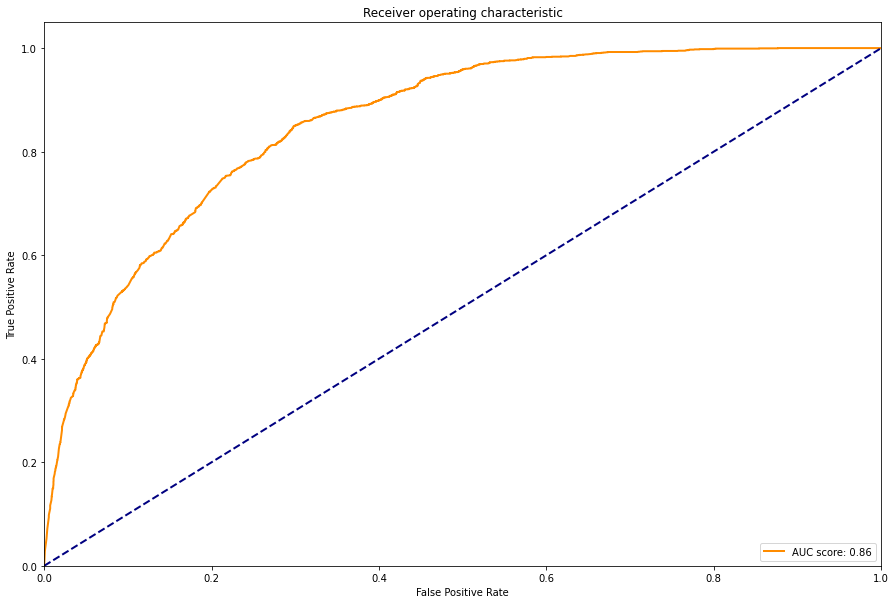

0.8550224876625463

In [12]:
y_pred = random_forest.predict(X_test)
y_pred_proba = random_forest.predict_proba(X_test)[:, 1]
graficar_auc_roc(y_test, y_pred_proba)

Podemos observar que 

Mostramos el classification report:

In [13]:
print(classification_report(y_test, y_pred, target_names=['No Tiene Alto Valor Adquisitivo', 'Tiene Alto Valor Adquisitivo']))


                                 precision    recall  f1-score   support

No Tiene Alto Valor Adquisitivo       0.76      1.00      0.86      6159
   Tiene Alto Valor Adquisitivo       0.00      0.00      0.00      1982

                       accuracy                           0.76      8141
                      macro avg       0.38      0.50      0.43      8141
                   weighted avg       0.57      0.76      0.65      8141



D:\CodingApps\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Por último, mostramos la matriz de confusión correspondiente:

In [14]:
from funcionesAuxiliares import graficar_matriz_confusion

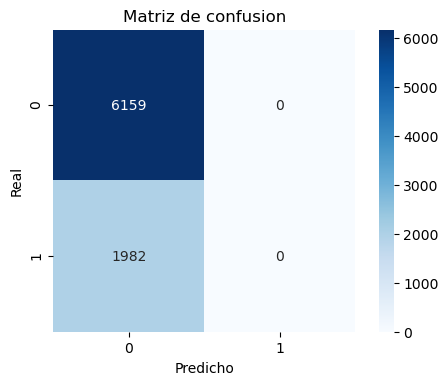

In [15]:
graficar_matriz_confusion(y_test, y_pred)

Podemos ver que

## Entrenamiento y predicción con el dataset ampliado
Como otra técnica de preprocesamiento, decidimos expandir el dataset utilizando clustering para obtener cuatro nuevas columnas. Las columnas corresponden a la utilización de K-means con 2, 4, 6 y 10 como cantidad de clusters usados. 

In [16]:
from preprocessing import expandir_dataset

Expandimos el dataset y realizamos el split del mismo en los subsets de entrenamiento y validación.

In [17]:
X_exp = expandir_dataset(X)
X_exp_train, X_exp_test, y_exp_train, y_exp_test = train_test_split(X_exp, y, test_size=0.25, random_state=0)

Buscamos la mejor combinación de hiperparámetros para este dataset.

In [18]:
mejor_combinacion = definir_mejores_hiperparametros(X_exp, y)
mejor_combinacion = mejor_combinacion[mejor_combinacion['profundidad_maxima'] == mejor_combinacion.profundidad_maxima.min()]

0.7783805005940325
0.6874640841155886
0.7137667025205371
0.6334717125370479
0.7717524684446253
Promedio de la combinacion 0.7169670936423664
0.5
0.6215244776049292
0.7642611490296106
0.7643239943425588
0.7400291378257329
Promedio de la combinacion 0.6780277517605663
0.6605471278645265
0.6265405663553305
0.6746627431631907
0.6440904604916713
0.6669055374592835
Promedio de la combinacion 0.6545492870668006
0.7651802722507265
0.6413590492370567
0.6593995046884713
0.651955367248183
0.6669055374592835
Promedio de la combinacion 0.6769599461767443
0.6643141615593262
0.8166517261806898
0.7329378784542087
0.7571019844713205
0.6305079397394137
Promedio de la combinacion 0.7203027380809918
0.6758622611961091
0.5503635300780036
0.7825628826980078
0.7782848941901285
0.7540200020358306
Promedio de la combinacion 0.708218714039616
0.6274385072094997
0.7562292692601784
0.763281400504469
0.7508553334946517
0.7722662611970683
Promedio de la combinacion 0.7340141543331734
0.7651802722507265
0.6650774948

0.8433542019550333
0.8500247480659608
Promedio de la combinacion 0.8382466643317308
0.7475793240646756
0.8157368334520743
0.8220133702113522
0.8265105090618213
0.8081463762214984
Promedio de la combinacion 0.8039972826022843
0.8555226481643701
0.8532996944050816
0.852222781702741
0.8167200583828205
0.8648275905944625
Promedio de la combinacion 0.848518554649895
0.834683617835497
0.8429733393878185
0.8151239117825687
0.817201572801538
0.8511366933021172
Promedio de la combinacion 0.832223827021908
0.827445858586795
0.8367722547998759
0.8159826876406387
0.8518150614730411
0.838925399531759
Promedio de la combinacion 0.8341882524064219
0.8061180453524617
0.8294490679485472
0.806975362030218
0.8173900557061706
0.7658947475570033
Promedio de la combinacion 0.8051654557188803
0.8599744800348952
0.8461691028140308
0.8667616800736034
0.8474095705903477
0.8575741169584691
Promedio de la combinacion 0.8555777900942692
0.8425653628850976
0.826266548708594
0.8427945232421663
0.8474814959236318
0.8

0.8375605683966479
0.8487104860029177
0.8524923686409189
0.8508614086165522
0.8536640497760586
Promedio de la combinacion 0.848657776286619
0.8501925777610924
0.8503987609182985
0.8445581876577442
0.8511184132449474
0.8455038680781758
Promedio de la combinacion 0.8483543615320516
0.8341636141070227
0.8406223984634134
0.8479309836625762
0.8433208722693418
0.8402774455415309
Promedio de la combinacion 0.841263062808777
0.8626484630600373
0.858675855391754
0.8665389212646145
0.8604676148480603
0.8732138131107492
Promedio de la combinacion 0.8643089335350431
0.846564331889837
0.8443680892097071
0.849566586152636
0.8584346324589782
0.8514937907166125
Promedio de la combinacion 0.8500854860855542
0.8463945163617712
0.8454254711146256
0.8555713831741589
0.8577144158404244
0.8539420678949512
Promedio de la combinacion 0.8518095708771863
0.8347568097442956
0.8329925075746306
0.8366550953492253
0.8370538638545916
0.8339173198289902
Promedio de la combinacion 0.8350751192703466
0.8544588227599672

0.8413166734527687
Promedio de la combinacion 0.8412852887178882
0.8597016679772975
0.8621849123274015
0.8658403366318114
0.8666715601580919
0.8644524251832247
Promedio de la combinacion 0.8637701804555654
0.845818122033378
0.8510030350716491
0.8550350710168091
0.8510028831783599
0.8505693327565147
Promedio de la combinacion 0.8506856888113422
0.8371969262745691
0.8470905197723304
0.8492130337772597
0.8539511796525288
0.8515037790105863
Promedio de la combinacion 0.8477910876974548
0.8369596480196598
0.837757935420565
0.8453907527712823
0.843838991545177
0.8446306239820847
Promedio de la combinacion 0.8417155903477538
0.8642172289504706
0.8578324029781804
0.8651465648900638
0.867507178405138
0.8637521630700327
Promedio de la combinacion 0.863691107658777
0.8490750010428398
0.8480924457249331
0.8533808673532103
0.854264375947552
0.8536522165105863
Promedio de la combinacion 0.8516929813158243
0.8477402947657678
0.8425868440213264
0.848214423922306
0.8527742371676215
0.8487103649226384
P

0.5
0.5
0.7579370752217149
0.6440904604916713
0.5948422231270358
Promedio de la combinacion 0.5993739517680844
0.5
0.7346204333654325
0.5
0.7597630933647339
0.6669055374592835
Promedio de la combinacion 0.63225781283789
0.7543120784545165
0.7415620832648289
0.7218187993345724
0.5
0.7896982517304559
Promedio de la combinacion 0.7014782425568747
0.7577724399826349
0.765349946631801
0.5
0.765881884217681
0.6507064332247557
Promedio de la combinacion 0.6879421408113745
0.5
0.7346204333654325
0.7579370752217149
0.5
0.5
Promedio de la combinacion 0.5985115017174294
0.7651802722507265
0.7547778238823342
0.5
0.5
0.6382410423452768
Promedio de la combinacion 0.6316398276956675
0.7682315444381103
0.74516795976899
0.7715812311297273
0.5
0.7125496869910424
Promedio de la combinacion 0.6995060844655739
0.8086939885560556
0.7678972668697007
0.7577297957109856
0.7211335381150323
0.776048325529316
Promedio de la combinacion 0.7663005829562181
0.6954137705330019
0.7346204333654325
0.7573817716564163
0.

0.8510547874589365
0.839912692758366
0.8436353483173807
0.8522025592061087
0.847320210708469
Promedio de la combinacion 0.8468251196898521
0.8385416747132706
0.811865029345985
0.8370154117877067
0.8382707505870907
0.8267413986156353
Promedio de la combinacion 0.8304868530099376
0.8448944362819695
0.8495355400887817
0.8600215513456779
0.8600566129435803
0.8500540131311076
Promedio de la combinacion 0.8529124307582234
0.8360667968542801
0.8429282569607007
0.8418666758935425
0.8401201949382033
0.8494490533387622
Promedio de la combinacion 0.8420861955970977
0.8425079423198836
0.8445702098453236
0.8568979850506402
0.8383786385870166
0.8339746411848534
Promedio de la combinacion 0.8432658833975435
0.8304773683150747
0.8104448350283282
0.8433310955557894
0.8368025105023829
0.8204534176506515
Promedio de la combinacion 0.8283018454104454
0.8562019102766332
0.8415695208866689
0.8625077347711998
0.8601384922292383
0.8522250992467426
Promedio de la combinacion 0.8545285514820966
0.84407432641557

0.8656450829016529
0.860590327259772
Promedio de la combinacion 0.8623938271587948
0.8449309356771223
0.854380237325379
0.8482773817404377
0.8519293713777246
0.8497063950529316
Promedio de la combinacion 0.849844864234719
0.8448258792169998
0.842041875115805
0.8510740616781093
0.8504103340263852
0.8521266795602607
Promedio de la combinacion 0.848095765919512
0.8379784768152237
0.8334545535208658
0.8416785178688987
0.8443296892876978
0.8321213991245928
Promedio de la combinacion 0.8379125273234557
0.8602773542045501
0.8571020807073308
0.8641646050365994
0.8644014168263151
0.8680136655130294
Promedio de la combinacion 0.862791824457565
0.8453147264952907
0.8493439887052535
0.8565871633431485
0.854999684042286
0.854278488904723
Promedio de la combinacion 0.8521048102981403
0.8469332525840542
0.845498346760198
0.8504745315463546
0.8491521544462957
0.850648539291531
Promedio de la combinacion 0.8485413649256867
0.8321475214142658
0.8340789875439407
0.836239950976152
0.8426250588888666
0.839

0.834571673482462
0.8388322803226622
0.8369824369800696
0.8448551295349566
0.8403035296213357
Promedio de la combinacion 0.8391090099882973
0.8607792047946945
0.8611289657530137
0.8701134684593688
0.8686349933186504
0.8705686965594464
Promedio de la combinacion 0.8662450657770346
0.8510504101064316
0.8513870512308611
0.854543895972872
0.8496135040840744
0.84822628257329
Promedio de la combinacion 0.8509642287935059
0.8468650173832393
0.8416342412451362
0.8522644067064645
0.8514149125876012
0.8530969437092834
Promedio de la combinacion 0.8490551043263448
0.837723817895956
0.8335032895166067
0.8445912925435181
0.8388573273676406
0.8412475824511401
Promedio de la combinacion 0.8391846619549723
0.8583698584776185
0.8592850879596646
0.8670859648682367
0.8650538823496773
0.8625068709283388
Promedio de la combinacion 0.8624603329167073
0.8479542056830395
0.8463348182480095
0.85310093920317
0.8540753792905388
0.8540435413273615
Promedio de la combinacion 0.8511017767504239
0.846573344086171
0.

A continuación, vemos la mejor combinación de hiperparámetros obtenida.

In [19]:
parametros_random_forest = mejor_combinacion.loc[:].values[0]
mejor_profundidad = parametros_random_forest[0]
mejor_estimadores = parametros_random_forest[1]
mejor_criterio = parametros_random_forest[2]
mejor_min_samples_leaf = parametros_random_forest[3]
print(f'Mejor profundidad máxima: {mejor_profundidad}')
print(f'Mejor n° de estimadores: {mejor_estimadores}')
print(f'Mejor criterio: {mejor_criterio}')
print(f'Mejor mínima cantidad de instancias por hoja: {mejor_min_samples_leaf}')

Mejor profundidad máxima: 2
Mejor n° de estimadores: 50
Mejor criterio: gini
Mejor mínima cantidad de instancias por hoja: 0.075


Entrenamos un RandomForest con esa combinación de hiperparámetros.

In [20]:
random_forest_expandido = RandomForestClassifier(max_depth = mejor_profundidad, n_estimators = mejor_estimadores, criterion = mejor_criterio, min_samples_leaf = mejor_min_samples_leaf)
random_forest_expandido.fit(X_exp_train, y_exp_train)

RandomForestClassifier(max_depth=2, min_samples_leaf=0.075, n_estimators=50)

Luego, hacemos que este prediga sobre el subset de validation. A continuación se muestra el gráfico de la curva ROC y su respectivo score en la métrica AUC-ROC.

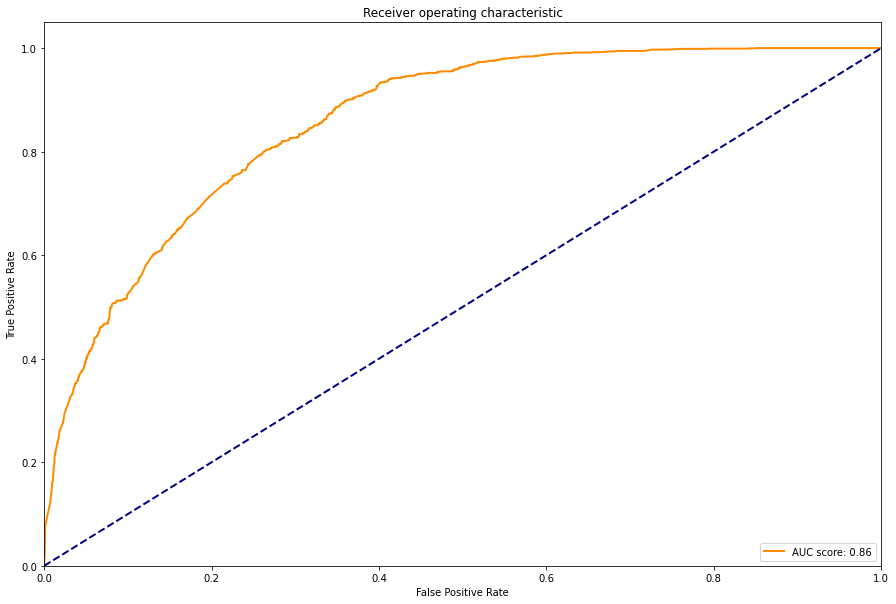

0.8573561632546465

In [22]:
y_pred = random_forest_expandido.predict(X_exp_test)
y_pred_proba = random_forest_expandido.predict_proba(X_exp_test)[:, 1]
graficar_auc_roc(y_exp_test, y_pred_proba)

Podemos observar que el score de AUC-ROC 

Mostramos el classification report:

In [23]:
print(classification_report(y_exp_test, y_pred, target_names=['No Tiene Alto Valor Adquisitivo', 'Tiene Alto Valor Adquisitivo']))

                                 precision    recall  f1-score   support

No Tiene Alto Valor Adquisitivo       0.76      1.00      0.86      6159
   Tiene Alto Valor Adquisitivo       0.00      0.00      0.00      1982

                       accuracy                           0.76      8141
                      macro avg       0.38      0.50      0.43      8141
                   weighted avg       0.57      0.76      0.65      8141



D:\CodingApps\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Por último, mostramos la matriz de confusión correspondiente:

In [24]:
from funcionesAuxiliares import graficar_matriz_confusion

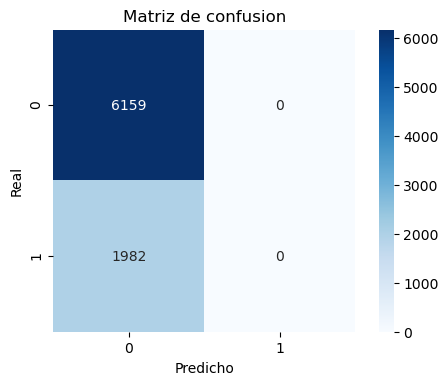

In [25]:
graficar_matriz_confusion(y_exp_test, y_pred)

Podemos ver que el random forest clasifica 

## Predicción con el dataset de test holdout
A continuación, realizamos la predicción con el random forest sin expandir el dataset sobre el dataset de holdout, y la escribimos al archivo 'RandomForest.csv'

In [26]:
from funcionesAuxiliares import traer_holdout
from preprocessing import preparar_holdout
from funcionesAuxiliares import escribir_predicciones

In [27]:
holdout = traer_holdout()
ids, holdout = preparar_holdout(holdout)
holdout = aplicar_one_hot_encoding(holdout)

In [28]:
predicciones = random_forest.predict(holdout)
escribir_predicciones(ids, predicciones, "RandomForest")